In [46]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier ,BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')



# EDA

In [2]:
df=pd.read_csv("C:/Users/MINA/Downloads/Churn_Modelling.csv")
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.drop(columns=["RowNumber","CustomerId"]).describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Check Missing Values

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Check Duplicated

In [6]:
df.duplicated().sum()

0

# Check Outliers

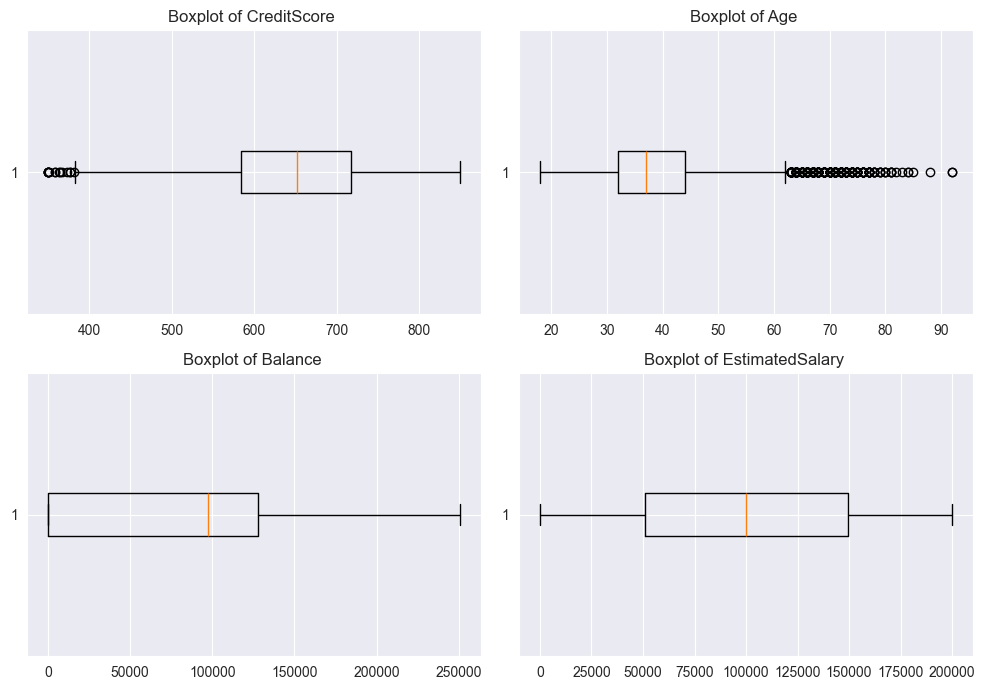

In [7]:
numeric_columns=["CreditScore","Age","Balance","EstimatedSalary"]
plt.figure(figsize=(10,7))
for i ,feature in enumerate(numeric_columns,start=1):
    plt.subplot(2,2,i)
    plt.boxplot(df[feature],vert=False)
    plt.title(f"Boxplot of {feature} ")
plt.tight_layout()    
plt.show()

# Data Analysis 

# univariate Analysis

In [8]:
df["CreditScore"].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

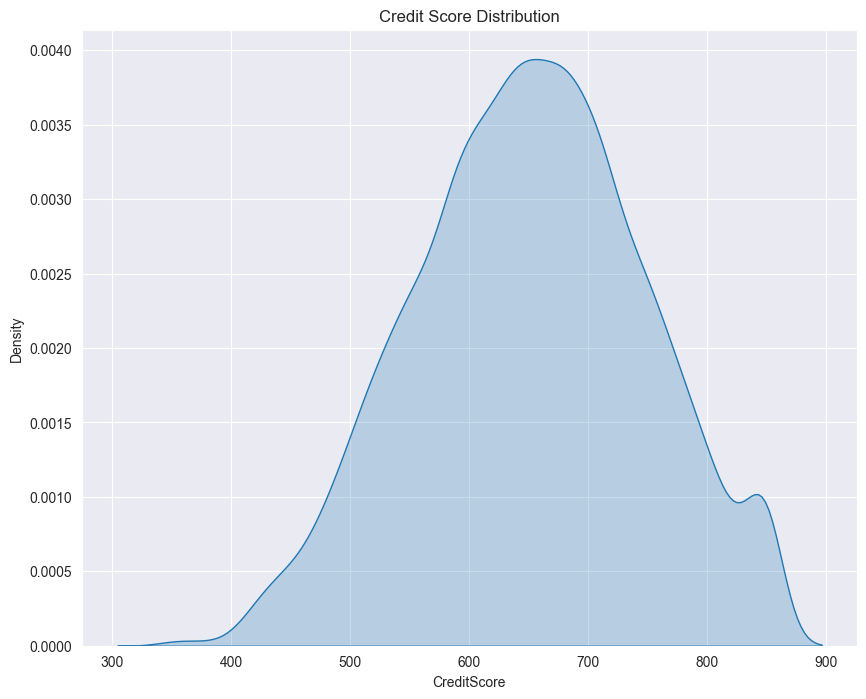

In [9]:
plt.figure(figsize=(10,8))
sns.kdeplot(df["CreditScore"],fill=True,palette="Set2")
plt.title("Credit Score Distribution")
plt.show()

In [10]:
GC=df["Geography"].value_counts()
GC

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

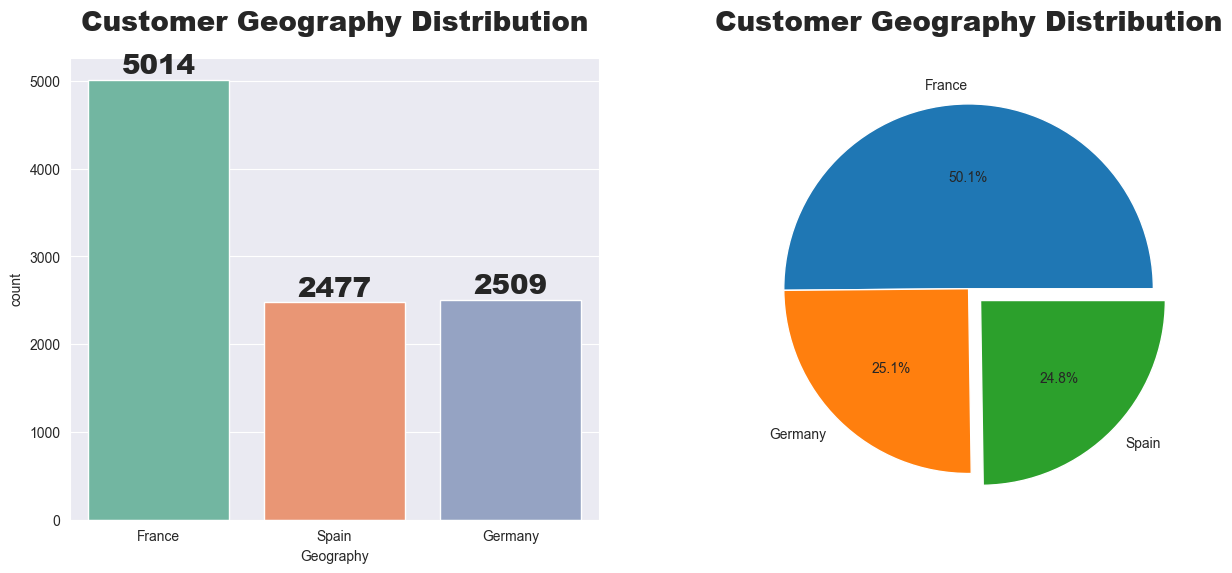

In [11]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df,x="Geography",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=20)
ax.bar_label(ax.containers[1],fontweight="black",size=20)
ax.bar_label(ax.containers[2],fontweight="black",size=20)
plt.title("Customer Geography Distribution",fontweight="black",size=20,pad=20)
plt.subplot(1,2,2)
plt.pie(GC.values,labels=GC.index,autopct="%1.1f%%",explode=[0.0,0.0,0.091],colors=sns.set_palette("Set2"))
plt.title("Customer Geography Distribution",fontweight="black",size=20,pad=20)
plt.show()

In [12]:
Gender_Count=df["Gender"].value_counts()
Gender_Count

Male      5457
Female    4543
Name: Gender, dtype: int64

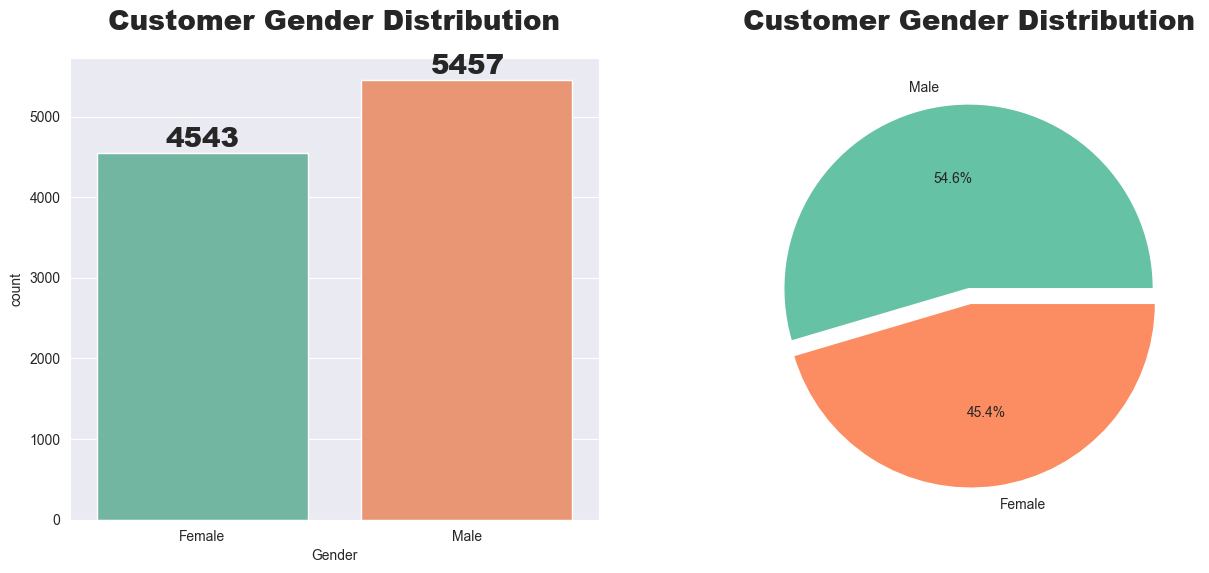

In [13]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df,x=df["Gender"],palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=20)
ax.bar_label(ax.containers[1],fontweight="black",size=20)
plt.title("Customer Gender Distribution",fontweight="black",size=20,pad=20)
plt.subplot(1,2,2)
plt.pie(Gender_Count.values,labels=Gender_Count.index,autopct="%1.1f%%",explode=[0.0,0.08],colors=sns.set_palette("Set2"))
plt.title("Customer Gender Distribution",fontweight="black",size=20,pad=20)
plt.show()

In [14]:
df["Age"].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

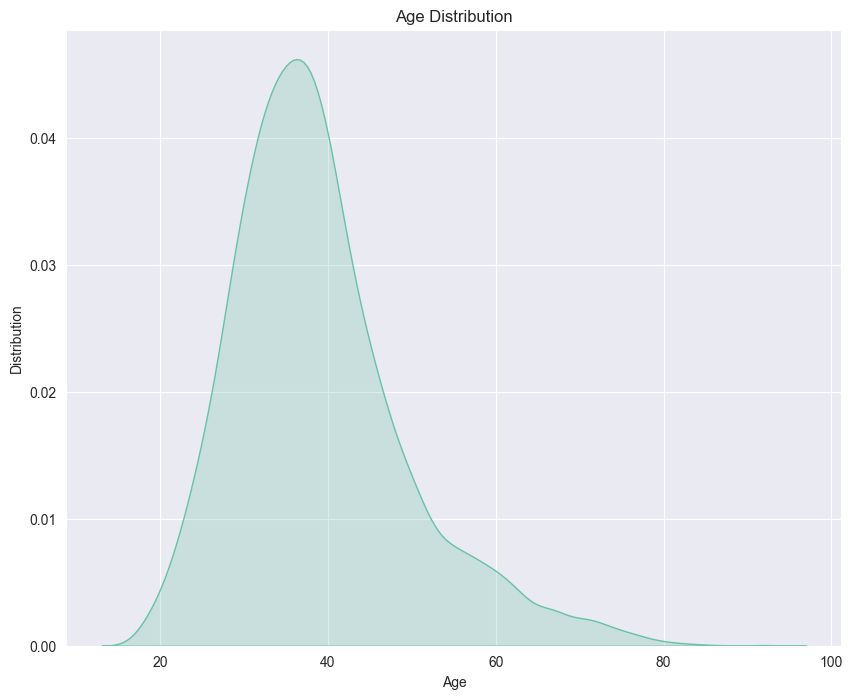

In [15]:
plt.figure(figsize=(10,8))
sns.kdeplot(df["Age"],fill=True,palette="Set2")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Distribution")
plt.show()

In [16]:
TC=df["Tenure"].value_counts()
TC

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

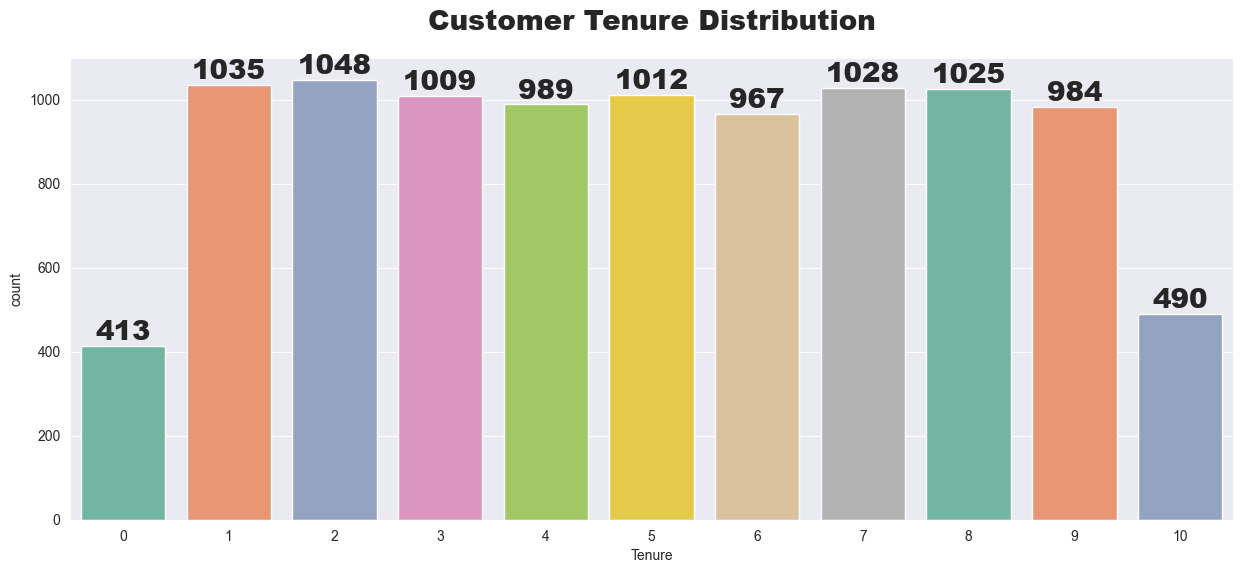

In [17]:
plt.figure(figsize=(15,6))
ax=sns.countplot(data=df,x=df["Tenure"],palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=20)
ax.bar_label(ax.containers[1],fontweight="black",size=20)
ax.bar_label(ax.containers[2],fontweight="black",size=20)
ax.bar_label(ax.containers[3],fontweight="black",size=20)
ax.bar_label(ax.containers[4],fontweight="black",size=20)
ax.bar_label(ax.containers[5],fontweight="black",size=20)
ax.bar_label(ax.containers[6],fontweight="black",size=20)
ax.bar_label(ax.containers[7],fontweight="black",size=20)
ax.bar_label(ax.containers[8],fontweight="black",size=20)
ax.bar_label(ax.containers[9],fontweight="black",size=20)
ax.bar_label(ax.containers[10],fontweight="black",size=20)
plt.title("Customer Tenure Distribution",fontweight="black",size=20,pad=20)
plt.show()

In [18]:
df["Balance"].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

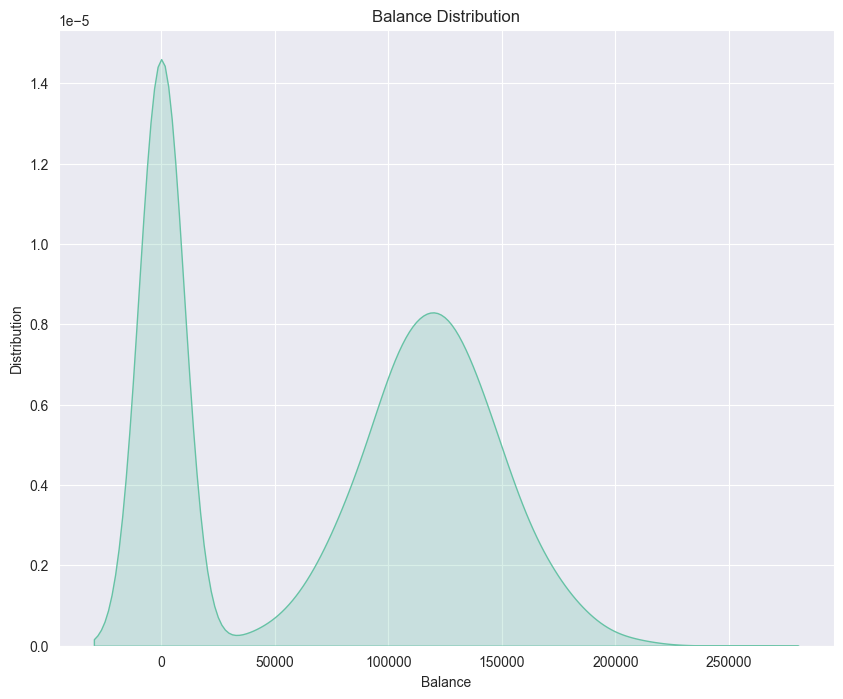

In [19]:
plt.figure(figsize=(10,8))
sns.kdeplot(df["Balance"],fill=True,palette="Set2")
plt.title("Balance Distribution")
plt.xlabel("Balance")
plt.ylabel("Distribution")
plt.show()

In [20]:
NC=df["NumOfProducts"].value_counts()
NC

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

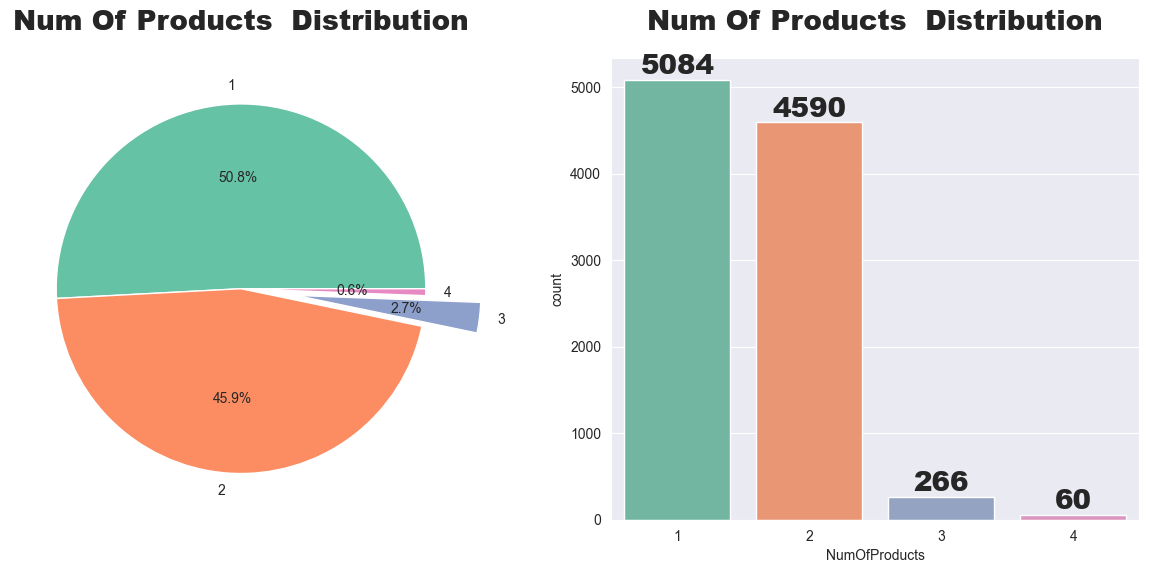

In [21]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.pie(NC.values,labels=NC.index,autopct="%1.1f%%",explode=[0.0,0.0,0.3,0.0],colors=sns.set_palette("Set2"))
plt.title("Num Of Products  Distribution",fontweight="black",size=20,pad=20)
plt.subplot(1,2,2)
ax=sns.countplot(data=df,x=df["NumOfProducts"],palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=20)
ax.bar_label(ax.containers[1],fontweight="black",size=20)
ax.bar_label(ax.containers[2],fontweight="black",size=20)
ax.bar_label(ax.containers[3],fontweight="black",size=20)
plt.title("Num Of Products  Distribution",fontweight="black",size=20,pad=20)
plt.show()

In [22]:
HC=df["HasCrCard"].value_counts()
HC

1    7055
0    2945
Name: HasCrCard, dtype: int64

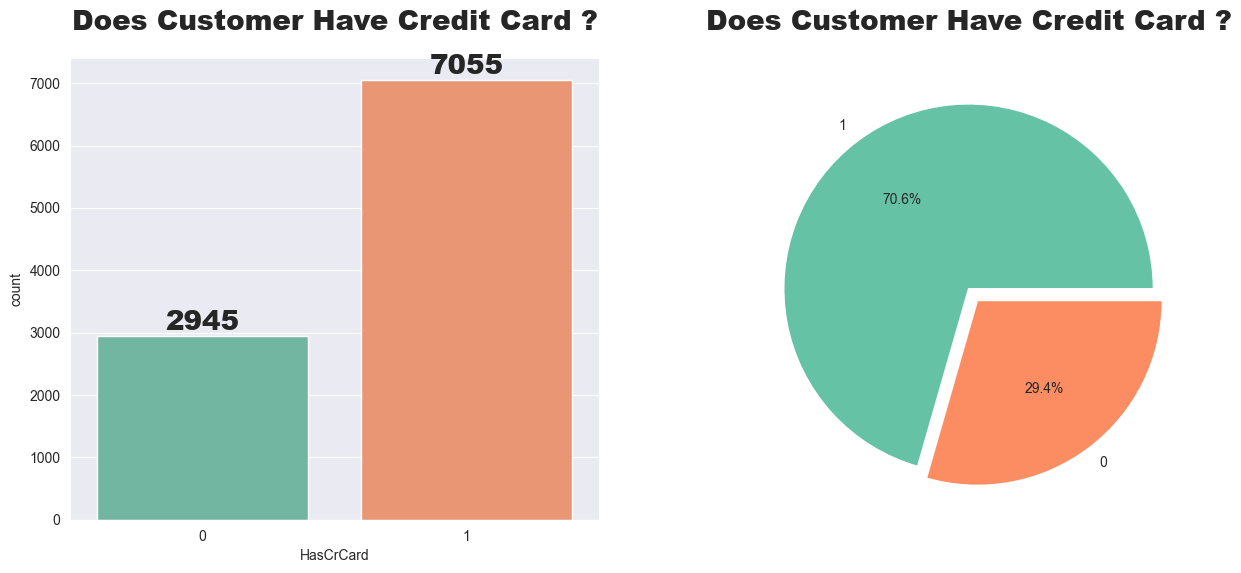

In [23]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df,x=df["HasCrCard"],palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=20)
ax.bar_label(ax.containers[1],fontweight="black",size=20)
plt.title("Does Customer Have Credit Card ?",fontweight="black",size=20,pad=20)
plt.subplot(1,2,2)
plt.pie(HC.values,labels=HC.index,autopct="%1.1f%%",explode=[0.0,0.08],colors=sns.set_palette("Set2"))
plt.title("Does Customer Have Credit Card ?",fontweight="black",size=20,pad=20)
plt.show()

In [24]:
IC=df["IsActiveMember"].value_counts()
IC

1    5151
0    4849
Name: IsActiveMember, dtype: int64

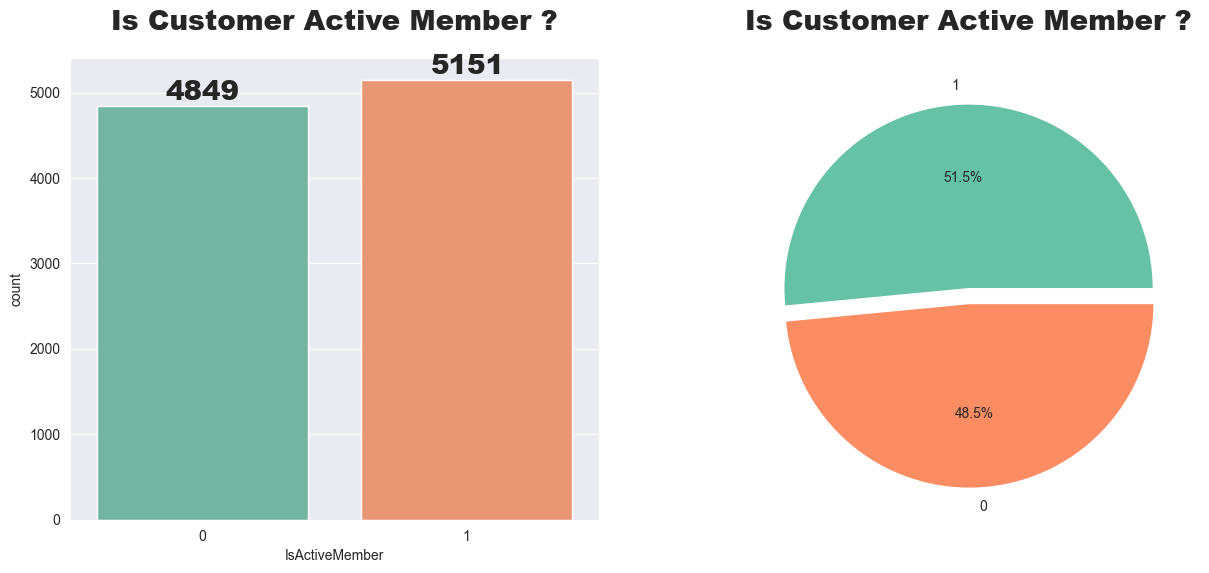

In [25]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df,x=df["IsActiveMember"],palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=20)
ax.bar_label(ax.containers[1],fontweight="black",size=20)
plt.title("Is Customer Active Member ?",fontweight="black",size=20,pad=20)
plt.subplot(1,2,2)
plt.pie(IC.values,labels=IC.index,autopct="%1.1f%%",explode=[0.0,0.08],colors=sns.set_palette("Set2"))
plt.title("Is Customer Active Member ?",fontweight="black",size=20,pad=20)
plt.show()

In [26]:
df["EstimatedSalary"].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

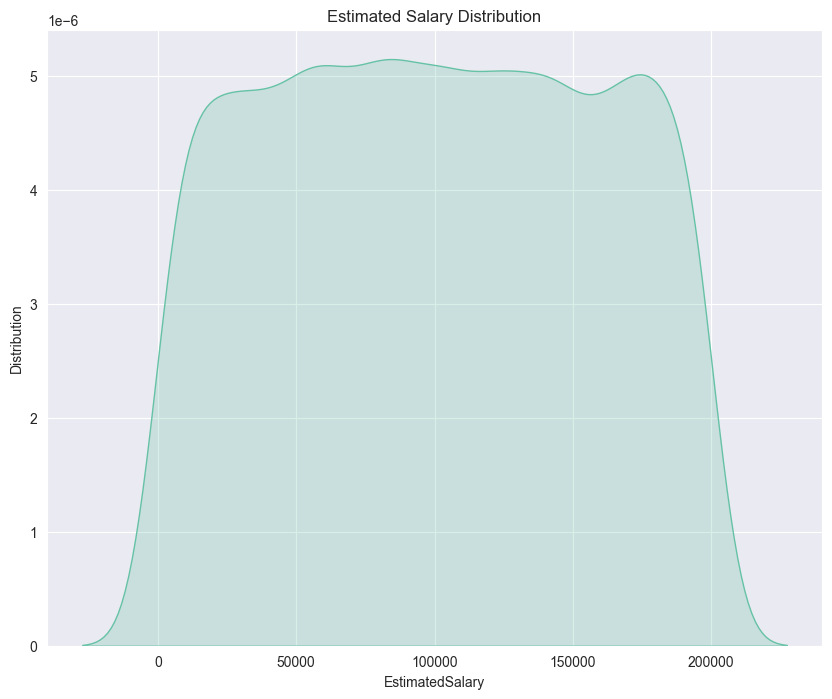

In [27]:
plt.figure(figsize=(10,8))
sns.kdeplot(df["EstimatedSalary"],fill=True,palette="Set2")
plt.title("Estimated Salary Distribution")
plt.xlabel("EstimatedSalary")
plt.ylabel("Distribution")
plt.show()

In [28]:
EC=df["Exited"].value_counts()
EC

0    7963
1    2037
Name: Exited, dtype: int64

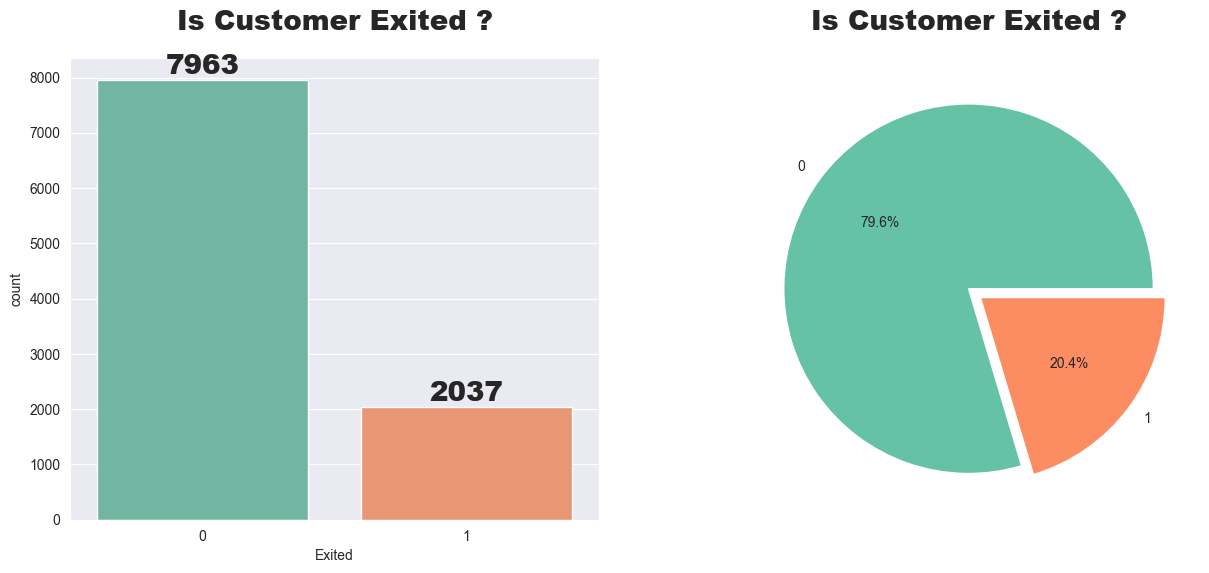

In [29]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df,x=df["Exited"],palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=20)
ax.bar_label(ax.containers[1],fontweight="black",size=20)
plt.title("Is Customer Exited ?",fontweight="black",size=20,pad=20)
plt.subplot(1,2,2)
plt.pie(EC.values,labels=EC.index,autopct="%1.1f%%",explode=[0.0,0.08],colors=sns.set_palette("Set2"))
plt.title("Is Customer Exited ?",fontweight="black",size=20,pad=20)
plt.show()

# Bivariant Analysis

**Numeric Data vs Target**

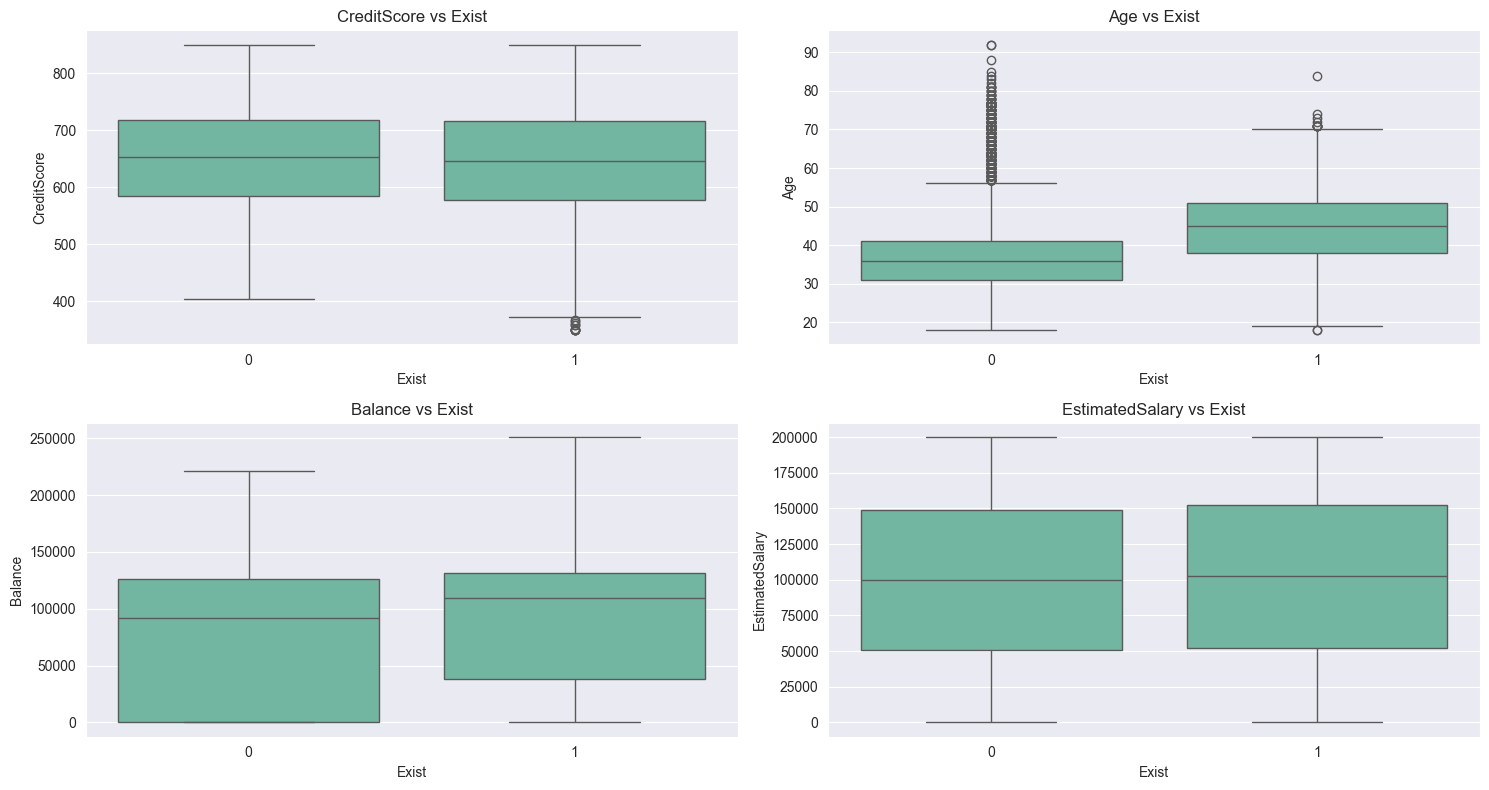

In [30]:
numeric_columns=["CreditScore","Age","Balance","EstimatedSalary"]
plt.figure(figsize=(15,8))
for i ,feature in enumerate(numeric_columns,start=1):
    plt.subplot(2,2,i)
    sns.boxplot(x="Exited",y=feature,data=df)
    plt.xlabel("Exist")
    plt.ylabel(feature)
    plt.title(f"{feature} vs Exist")
plt.tight_layout()    
plt.show()    

**Categorical Data vs Target**

In [31]:
categorical=["Geography","Gender","Tenure","NumOfProducts","HasCrCard","IsActiveMember"]

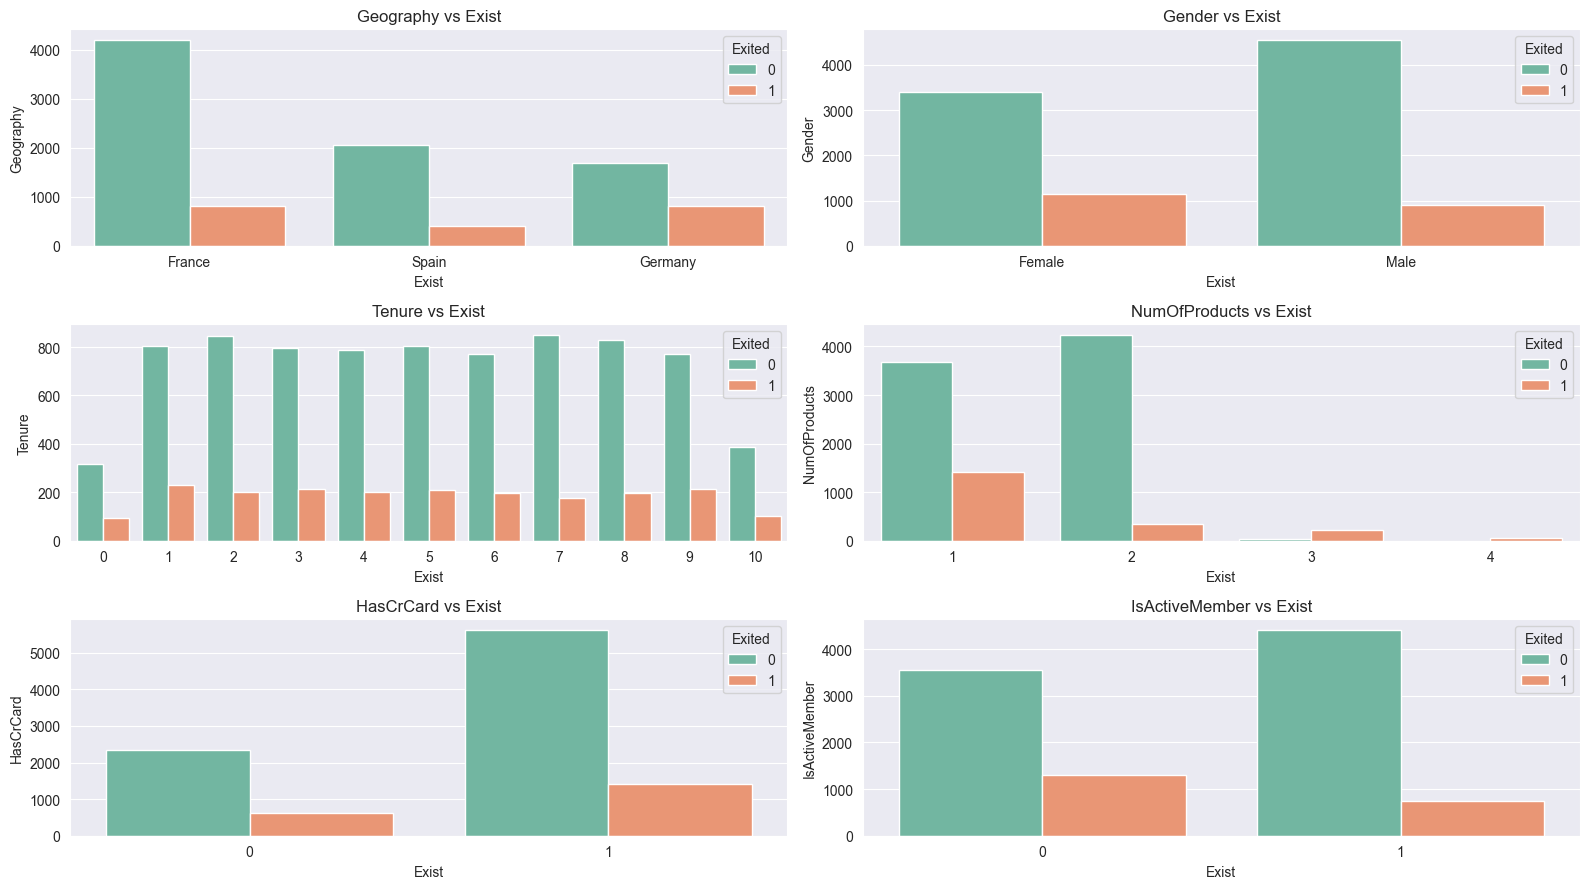

In [32]:
plt.figure(figsize=(16,9))
for i ,feature in enumerate(categorical,start=1):
    plt.subplot(3,2,i)
    sns.countplot(x=feature,hue="Exited",data=df)
    plt.xlabel("Exist")
    plt.ylabel(feature)
    plt.title(f"{feature} vs Exist")
plt.tight_layout()    
plt.show()   

In [1]:
numeric=["CreditScore","Age","Balance","EstimatedSalary","Tenure","NumOfProducts","HasCrCard","IsActiveMember","Exist"]
cm=df[numeric].corr()
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,cmap="coolwarm")
plt.show()

NameError: name 'df' is not defined

# Data Preprocessing

**drop uneeded column**

In [34]:
df.drop(columns=["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

**Define Feature X  Define Target y**

In [35]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [36]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [37]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [38]:
X=pd.get_dummies(X,columns=["Geography","Gender"],drop_first=False)
X


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


In [39]:
Scaler=StandardScaler()
numeric_feature=["CreditScore","Age","Tenure","Balance","EstimatedSalary"]
X[numeric_feature]=Scaler.fit_transform(X[numeric_feature])
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,1,1,1,0.021886,1,0,0,1,0
1,-0.440036,0.198164,-1.387538,0.117350,1,0,1,0.216534,0,0,1,1,0
2,-1.536794,0.293517,1.032908,1.333053,3,1,0,0.240687,1,0,0,1,0
3,0.501521,0.007457,-1.387538,-1.225848,2,0,0,-0.108918,1,0,0,1,0
4,2.063884,0.388871,-1.041760,0.785728,1,1,1,-0.365276,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,2,1,0,-0.066419,1,0,0,0,1
9996,-1.391939,-0.373958,1.724464,-0.306379,1,1,1,0.027988,1,0,0,0,1
9997,0.604988,-0.278604,0.687130,-1.225848,1,0,1,-1.008643,1,0,0,1,0
9998,1.256835,0.293517,-0.695982,-0.022608,2,1,0,-0.125231,0,1,0,0,1


# Data Spliting

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


# Machine Learing Models

In [41]:
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Bagging": BaggingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "LightGBM": LGBMClassifier()
}

Training Logistic Regression...

Logistic Regression - Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



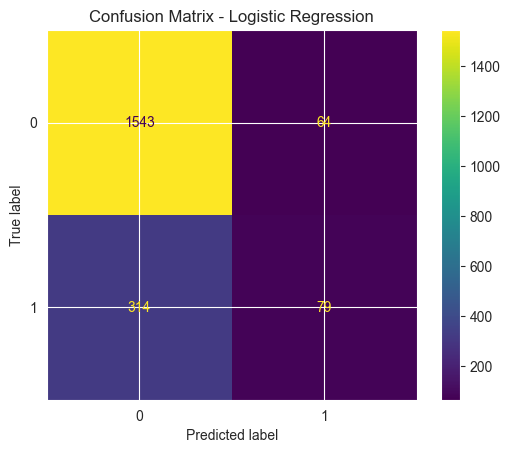

Training SVM...

SVM - Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1607
           1       0.78      0.35      0.48       393

    accuracy                           0.85      2000
   macro avg       0.82      0.66      0.70      2000
weighted avg       0.84      0.85      0.83      2000



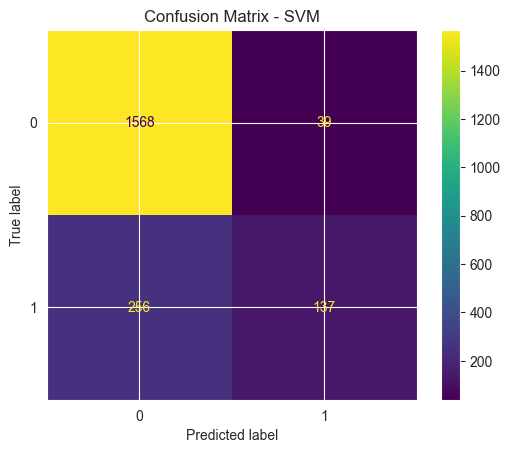

Training KNN...

KNN - Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1607
           1       0.62      0.37      0.46       393

    accuracy                           0.83      2000
   macro avg       0.74      0.66      0.68      2000
weighted avg       0.81      0.83      0.81      2000



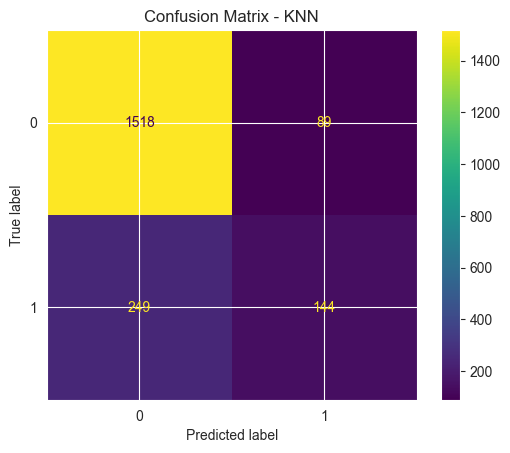

Training Decision Tree...

Decision Tree - Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1607
           1       0.44      0.49      0.46       393

    accuracy                           0.78      2000
   macro avg       0.66      0.67      0.66      2000
weighted avg       0.79      0.78      0.78      2000



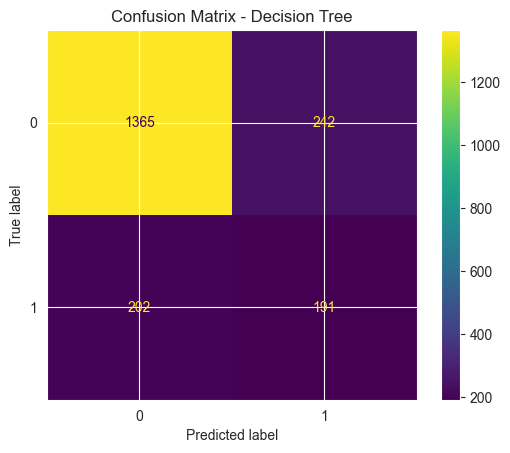

Training Random Forest...

Random Forest - Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000



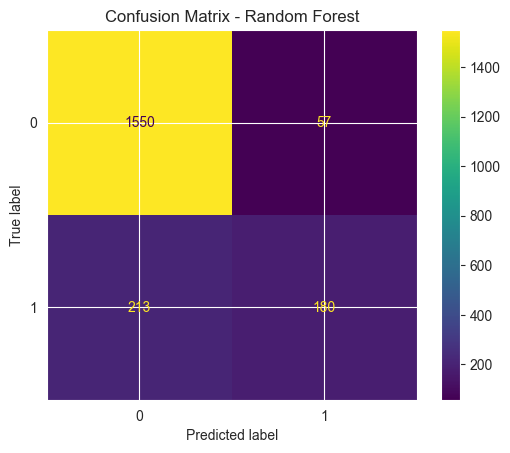

Training Bagging...

Bagging - Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1607
           1       0.67      0.48      0.56       393

    accuracy                           0.85      2000
   macro avg       0.77      0.71      0.73      2000
weighted avg       0.84      0.85      0.84      2000



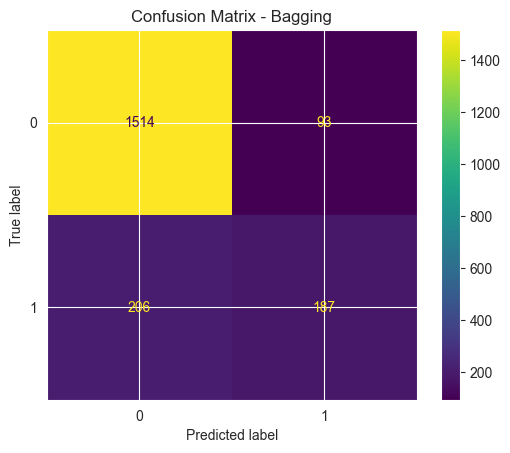

Training AdaBoost...

AdaBoost - Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1607
           1       0.70      0.49      0.57       393

    accuracy                           0.86      2000
   macro avg       0.79      0.72      0.74      2000
weighted avg       0.85      0.86      0.85      2000



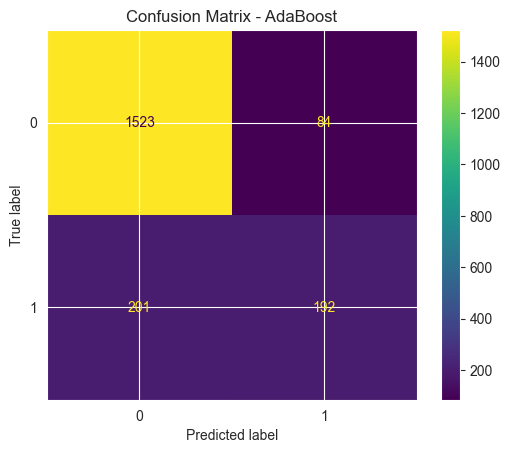

Training Gradient Boosting...

Gradient Boosting - Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.48      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



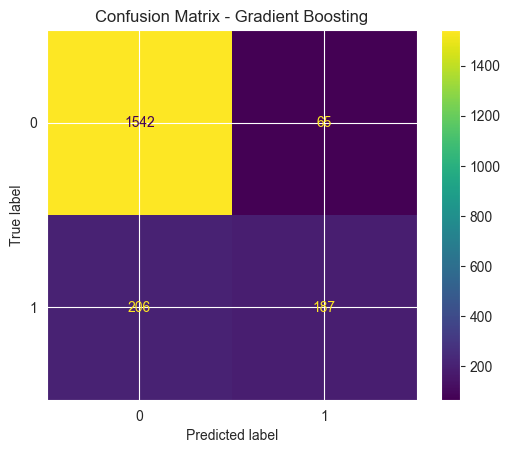

Training Extra Trees...

Extra Trees - Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



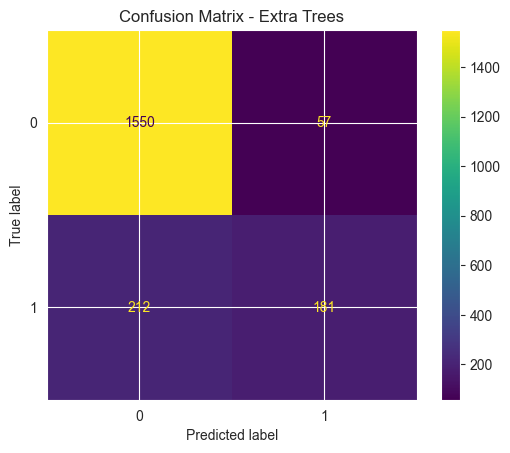

Training XGBoost...

XGBoost - Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.70      0.51      0.59       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



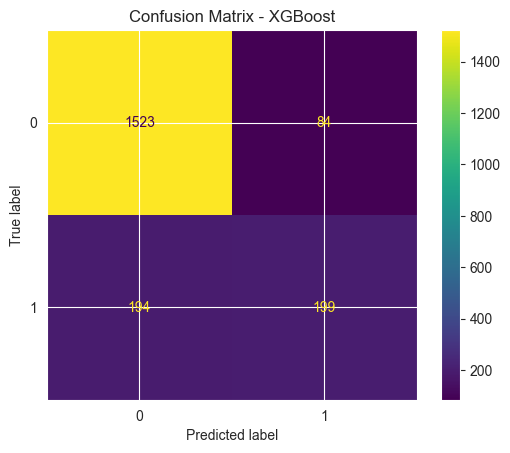

Training CatBoost...

CatBoost - Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1607
           1       0.73      0.50      0.60       393

    accuracy                           0.87      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



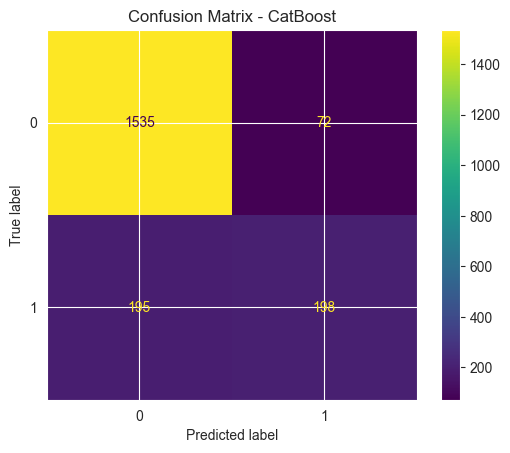

Training LightGBM...
[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000603 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 862
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205500 -> initscore=-1.352267
[LightGBM] [Info] Start training from score -1.352267

LightGBM - Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1607
           1       0.75      0.50      0.60       393

    accuracy                           0.87      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



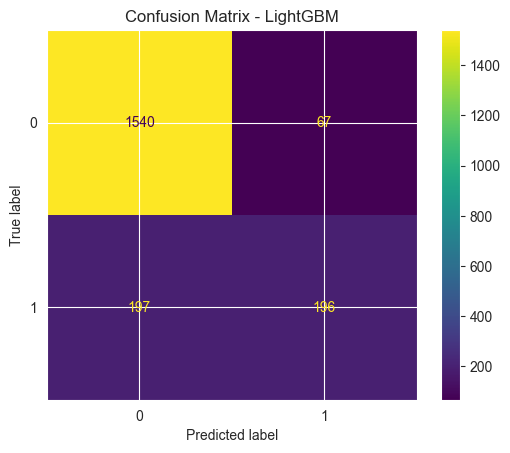

In [42]:
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[name] = {
        "Accuracy": accuracy,
        "Recall": recall,
        "Precision": precision,
        "F1 Score": f1
    }
    cm = confusion_matrix(y_test, y_pred)
    print(f"\n{name} - Classification Report:\n")
    print(classification_report(y_test, y_pred))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

In [43]:
print("\nSummary of Results:")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")


Summary of Results:

Logistic Regression:
Accuracy: 0.8110
Recall: 0.8110
Precision: 0.7762
F1 Score: 0.7737

SVM:
Accuracy: 0.8525
Recall: 0.8525
Precision: 0.8437
F1 Score: 0.8290

KNN:
Accuracy: 0.8310
Recall: 0.8310
Precision: 0.8117
F1 Score: 0.8134

Decision Tree:
Accuracy: 0.7780
Recall: 0.7780
Precision: 0.7866
F1 Score: 0.7820

Random Forest:
Accuracy: 0.8650
Recall: 0.8650
Precision: 0.8557
F1 Score: 0.8514

Bagging:
Accuracy: 0.8505
Recall: 0.8505
Precision: 0.8385
F1 Score: 0.8405

AdaBoost:
Accuracy: 0.8575
Recall: 0.8575
Precision: 0.8465
F1 Score: 0.8475

Gradient Boosting:
Accuracy: 0.8645
Recall: 0.8645
Precision: 0.8546
F1 Score: 0.8525

Extra Trees:
Accuracy: 0.8655
Recall: 0.8655
Precision: 0.8563
F1 Score: 0.8521

XGBoost:
Accuracy: 0.8610
Recall: 0.8610
Precision: 0.8509
F1 Score: 0.8520

CatBoost:
Accuracy: 0.8665
Recall: 0.8665
Precision: 0.8570
F1 Score: 0.8566

LightGBM:
Accuracy: 0.8680
Recall: 0.8680
Precision: 0.8588
F1 Score: 0.8575


# Compare Models Performance

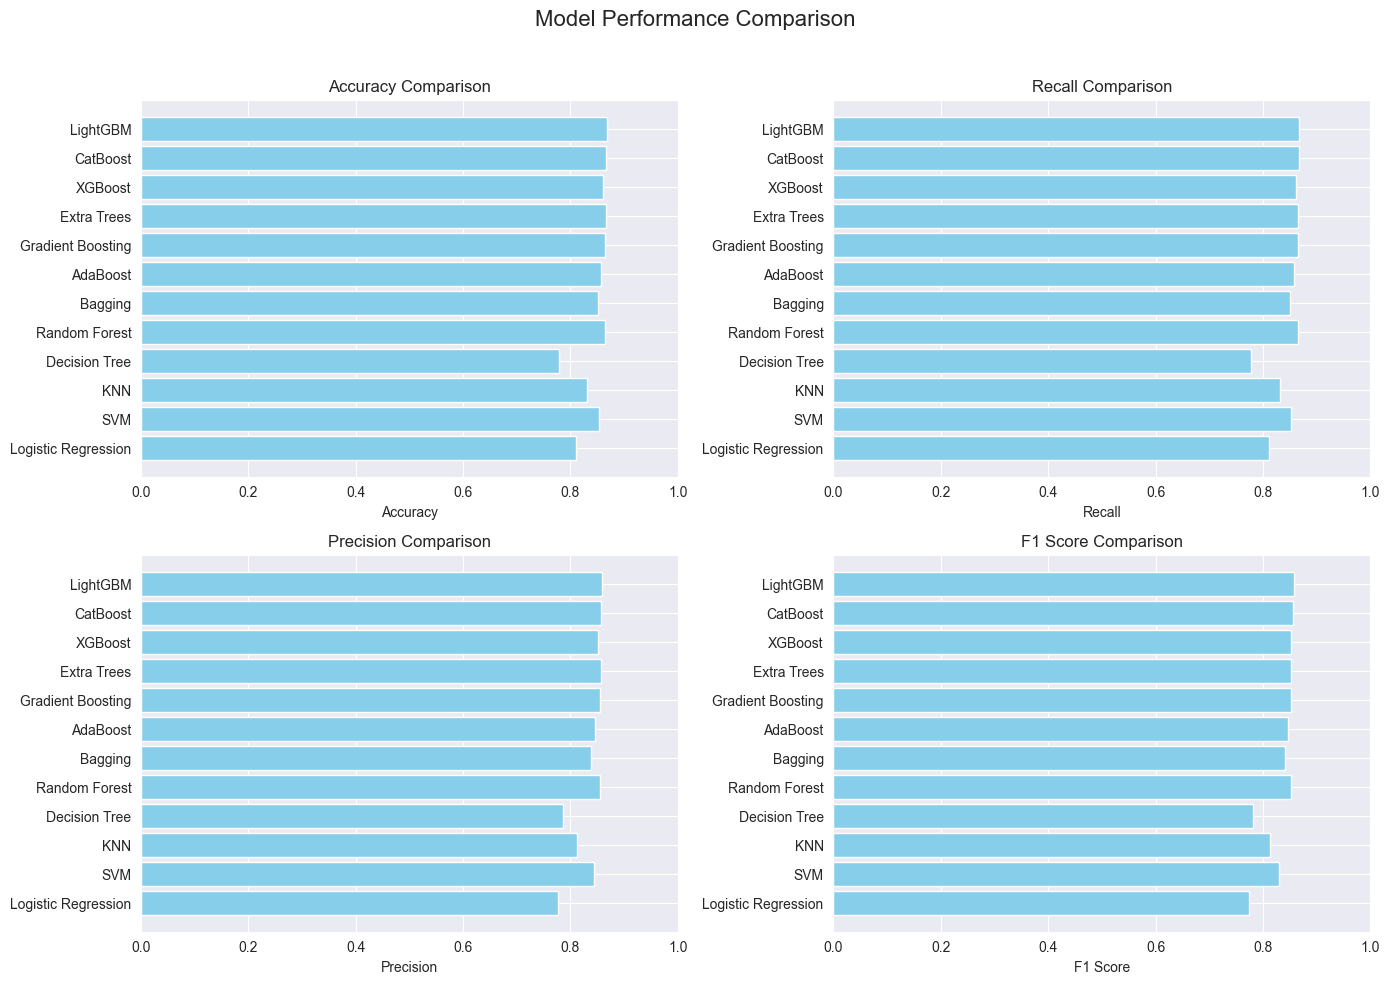

In [44]:
metrics = ["Accuracy", "Recall", "Precision", "F1 Score"]
model_names = list(results.keys())
metric_values = {metric: [results[model][metric] for model in model_names] for metric in metrics}
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Model Performance Comparison', fontsize=16)
axes = axes.flatten()
for i, metric in enumerate(metrics):
    ax = axes[i]
    ax.barh(model_names, metric_values[metric], color='skyblue')
    ax.set_title(f'{metric} Comparison')
    ax.set_xlabel(metric)
    ax.set_xlim(0, 1)  

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
